### Composite GPH plot of wavebreaking events. 

In [1]:
#relevant import statements
import numpy as np
import math
import xarray as xr 
import pickle 
import pandas as pd
import matplotlib.ticker as mticker

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cartopy.feature
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [2]:
infile = open("./wavebreak_data/ANOM10gph_wb.p", 'rb') 
gph100 = pickle.load(infile)
infile.close()

infile = open("./wavebreak_data/10gph_wb.p", 'rb') 
gph100_2 = pickle.load(infile)
infile.close()

In [3]:
gph100.shape

(63, 152, 36, 145)

In [4]:
gph100_2.shape

(63, 152, 36, 145)

In [5]:
gph100= np.delete(gph100,[120],1)
gph100.shape 

gph100_2= np.delete(gph100_2,[120],1)
gph100_2.shape 

(63, 151, 36, 145)

### Import files for making the DATA dictionary later.

In [6]:
##save lat lon indices
lats = np.arange(90, 0, -2.5)
lons = np.arange(-180, 180.5, 2.5)

In [7]:
len(lats)

36

In [8]:
len(lons)

145

### Loop and collect data from events.

In [9]:
all_year = [20,21,22,23,24,24,24,25,26,27,29,30,31,32,32,33,34,34,35,36,38,40,
           41,42,43,43,44,45,45,46,47,48,48,50,52,52,53,54,54,55,56,58,60,61]
len(all_year)

44

In [10]:
all_index = [104,77,50,69,40,68,91,40,88,70,84,70,76,62,95,97,41,126,64,80,55,
            119,76,71,95,116,56,56,106,64,82,34,69,79,43,93,53,76,111,106,62,73,
            89,43]
len(all_index)

44

In [11]:
warm_year = [21,23,24,26,30,35,45,46,48,52,58,61]
print(len(warm_year))
warm_index = [77,79,91,88,70,64,56,64,34,43,73,43]

cold_year = [22,24,24,25,27,29,31,32,32,33,34,34,36,38,40,42,43,43,44,45,47,
            48,50,52,54,54,56,60]
print(len(cold_year))
cold_index = [50,40,68,40,70,84,76,62,95,97,41,126,80,55,119,71,95,116,56,106,
             82,69,79,93,76,111,62,89]

12
28


In [12]:
neut_year = [20,41,53,55]
neut_index = [104,76,53,106]

In [13]:
##at 0 days lead at first
all_events = np.empty((len(all_year),36,145))
cold_events = np.empty((len(cold_year),36,145))
warm_events = np.empty((len(warm_year),36,145))
neut_events = np.empty((len(neut_year),36,145))

all_events_comp = np.empty((len(all_year),36,145))
cold_events_comp = np.empty((len(cold_year),36,145))
warm_events_comp = np.empty((len(warm_year),36,145))
neut_events_comp = np.empty((len(neut_year),36,145))

In [14]:
for i in range(0,len(all_year)):
    all_events[i,:,:] = gph100[all_year[i],all_index[i]+10,:,:]
    all_events_comp[i,:,:] = gph100_2[all_year[i],all_index[i]+10,:,:]

for i in range(0,len(cold_year)):
    cold_events[i,:,:] = gph100[cold_year[i],cold_index[i]+10,:,:]
    cold_events_comp[i,:,:] = gph100_2[cold_year[i],cold_index[i]+10,:,:]

for i in range(0,len(warm_year)):
    warm_events[i,:,:] = gph100[warm_year[i],warm_index[i]+10,:,:]
    warm_events_comp[i,:,:] = gph100_2[warm_year[i],warm_index[i]+10,:,:]
    
for i in range(0,len(neut_year)):
    neut_events[i,:,:] = gph100[neut_year[i],neut_index[i]+10,:,:]
    neut_events_comp[i,:,:] = gph100_2[neut_year[i],neut_index[i]+10,:,:]

In [15]:
all_events.shape

(44, 36, 145)

In [16]:
all_events_comp.shape

(44, 36, 145)

### Next Cells will need to be changed to correspond with which data is being plotted. 

In [40]:
DATA = xr.DataArray(data= np.mean(neut_events,axis=0), 
                       dims = ["lat","lon"],
                       coords = dict(
                           lat = lats,
                           lon = lons)
                      )

In [41]:
DATA_comp = xr.DataArray(data= np.mean(neut_events_comp,axis=0), 
                       dims = ["lat","lon"],
                       coords = dict(
                           lat = lats,
                           lon = lons)
                      )

In [42]:
DATA[:21,:]

<xarray.DataArray (lat: 21, lon: 145)>
array([[-459.34137501, -459.34137501, -459.34137501, ..., -459.34137501,
        -459.34137501, -459.34137501],
       [-359.55601872, -357.41361412, -355.30965072, ..., -364.93820334,
        -362.28401635, -359.55601872],
       [-234.11661853, -229.38419251, -225.51673766, ..., -245.49650199,
        -239.4331333 , -234.11661853],
       ...,
       [  25.18378709,   13.70478577,    3.42837069, ...,   44.93410514,
          35.70898915,   25.18378709],
       [ -12.61203694,  -28.58509346,  -40.23694744, ...,    5.39210779,
          -2.26038279,  -12.61203694],
       [ -48.20265602,  -59.55757356,  -68.52138802, ...,  -35.97589063,
         -37.09523607,  -48.20265602]])
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 50.0 47.5 45.0 42.5 40.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 175.0 177.5 180.0

In [43]:
DATA_comp[:21,:]

<xarray.DataArray (lat: 21, lon: 145)>
array([[28676.97183996, 28676.97183996, 28676.97183996, ...,
        28676.97183996, 28676.97183996, 28676.97183996],
       [28906.62111366, 28910.99722859, 28914.99108053, ...,
        28896.15825688, 28901.48286188, 28906.62111366],
       [29188.42778415, 29197.55033129, 29205.33893986, ...,
        29166.38793323, 29177.98005861, 29188.42778415],
       ...,
       [30925.44676988, 30912.36063328, 30899.48872324, ...,
        30945.69794852, 30937.1814475 , 30925.44676988],
       [30863.74792941, 30844.7773318 , 30829.81014271, ...,
        30884.06998598, 30876.290934  , 30863.74792941],
       [30803.32489169, 30788.32982926, 30775.4499554 , ...,
        30819.71601045, 30816.99955403, 30803.32489169]])
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 50.0 47.5 45.0 42.5 40.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 175.0 177.5 180.0

CHECK
It is True that the contour includes the pole
Running ellipse diagnostic now


<Figure size 540x540 with 0 Axes>

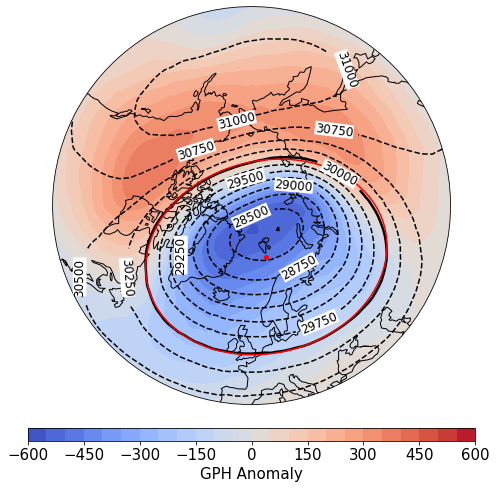

In [47]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from geopy.distance import great_circle
from fitEllipse3_new import point_inside_polygon
from fitEllipse3_new import fitEllipseContour
import matplotlib.colors
import matplotlib.cm

%matplotlib inline
color = 'coolwarm' 
colorbarMin = -600
colorbarMax = 600
colorspace = 50
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats[:21],DATA[:21,:], level, transform=ccrs.PlateCarree(), cmap=color)
cbar = plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="GPH Anomaly")
cbar.ax.tick_params(labelsize=15)
cbar.set_label("GPH Anomaly", fontsize=15)

highlight_level = 30000
#highlight_level = 15500
level_cont = np.arange(28500, 32000, 250)
#level_cont = np.arange(14000, 16501, 150)

g_cont = plt.contour(lons,lats[:21],DATA_comp[:21,:], level_cont, transform=ccrs.PlateCarree(), colors = 'k')
labels = plt.clabel(g_cont, inline = True, fontsize = 12) 
for text in g_cont.labelTexts:
    #text.set_rotation(0)
    text.set_backgroundcolor("white")
    text.set_bbox(dict(facecolor="white",edgecolor="none",pad=.35))

#contour lines
for collection, level in zip(g_cont.collections, g_cont.levels):
    if level == highlight_level:
        collection.set_linestyle('solid')  # Solid line for 15500
        collection.set_linewidth(2.5)      # Thicker line for emphasis
        collection.set_color('black')        # Optional: change color to highlight
    else:
        collection.set_linestyle('dashed')  # Dashed lines for all other contours

############################################
try:
    lev_contour_ind = np.where(np.array(g_cont.levels)==highlight_level)[0][0]
    isoline_list = g_cont.allsegs[lev_contour_ind]
except:
    print("Contours not found")
    isoline_list = []
     
if len(isoline_list) > 0:
    lev_contour_ind = np.where(np.array(g_cont.levels)==highlight_level)[0][0]
    isoline_list = g_cont.allsegs[lev_contour_ind]
else:
    print("Contours not found.")
    isoline_list = []

##number of contours
isocount = 0
small = 0
for isoline in isoline_list:
    ##next few lines will check if the contour crossing the prime meridian is one continuous contour or two separate ones
    #print('isoline',isoline)
    #[iso_lon,iso_lat] = mm(isoline[:,0],isoline[:,1],inverse=True)
    [iso_lon,iso_lat] = [isoline[:,0],isoline[:,1]]
    if len(iso_lon)<15:
        print("-----Not analyzing ellipse with",len(iso_lon),"points, continuing...")  # Check for size!
        small = 1
        continue
    # Checking to see if contours are closed (0) or need to be joined (1)  Checking before convert lat/lon to radians
    lon_diff = abs(iso_lon[0] - iso_lon[len(iso_lon)-1])
    lat_diff = abs(iso_lat[0] - iso_lat[len(iso_lat)-1])
    join = 0
    if lon_diff > 1 or lat_diff > 1:
        print("CHECK")
        join = 1
        #print("Diffs lat/lon: ",lat_diff,lon_diff)
        iso_lon = np.deg2rad(iso_lon)
        iso_lat = np.deg2rad(iso_lat)
         
        ex = np.array((np.cos(iso_lon)*np.cos(iso_lat))/(1+np.sin(iso_lat)))
        ey = np.array((np.sin(iso_lon)*np.cos(iso_lat))/(1+np.sin(iso_lat)))
        ## does this contour include the pole?
        overpole = point_inside_polygon(0,0,ex,ey)  #returns true if poly includes the pole, false if not
        print("It is",overpole, "that the contour includes the pole")
        if not overpole and len(isoline_list) > 1 and join > 0 and small < 1:
            if isocount > 0:
                ex = np.append(ex,ex2)
                ey = np.append(ey,ey2)
                print("Point didn't include pole - add to these to previous set")
            else:
                ex2 = ex
                ey2 = ey
                print("Point didn't include pole - keeping these to add to next set")
                isocount = 1
                continue
        ##begin actual calculation        
        print("Running ellipse diagnostic now")
        exx,eyy,eaax,ebax,ecenterx,ecentery,ephi = fitEllipseContour(ex,ey)
                
        ## Convert back to lat/lon
        elons = np.where(exx<0,np.where(eyy>0,np.arctan(eyy/exx)+math.pi,np.arctan(eyy/exx)-math.pi),np.arctan(eyy/exx))
        yysinxxlon = eyy/np.sin(elons)
        elats = -2*(np.arctan(yysinxxlon) - (math.pi/4.0))
        elats = np.rad2deg(elats)
        elons = np.rad2deg(elons)
                
        ## Still not really sure what this is for...
        for g in range(1,len(elats)):
            if abs(elats[g]-elats[g-1]) > 1.5:
                elats[g] = elats[g-1]
                
        ## Center points back to lat/lon
        cenlon = np.where(ecenterx<0,np.where(ecentery>0,np.arctan(ecentery/ecenterx)+math.pi,np.arctan(ecentery/ecenterx)-math.pi),np.arctan(ecentery/ecenterx))
        ysinlon = ecentery/np.sin(cenlon)
        cenlat = np.rad2deg(-2 * (np.arctan(ysinlon) - (math.pi/4.0)))
        cenlon = np.rad2deg(cenlon)
        #print("Center of ellipse:",cenlat,"N",cenlon,"E")
                
        ## Calculate endpoints of the axes of the vortex, convert to lat/lon
        xa = eaax * np.cos(ephi)
        ya = eaax * np.sin(ephi)
        xb = ebax * np.sin(ephi)
        yb = ebax * np.cos(ephi)
        endx = np.array([ecenterx+xa,ecenterx-xa,ecenterx+xb,ecenterx-xb])
        endy = np.array([ecentery+ya,ecentery-ya,ecentery-yb,ecentery+yb])
        endlon = np.where(endx < 0,np.where(endy>0,np.arctan(endy/endx)+math.pi,np.arctan(endy/endx)-math.pi),np.arctan(endy/endx))
        ysinelon = endy/np.sin(endlon)
        endlat = np.rad2deg(-2 *(np.arctan(ysinelon) - (math.pi/4)))
        endlon = np.rad2deg(endlon)
                
        ## Calc great circle distances; (still necessary?) 
        a1gc = great_circle((endlat[0],endlon[0]),(cenlat,cenlon)).km
        a2gc = great_circle((cenlat,cenlon),(cenlat,endlat[1])).km
        b1gc = great_circle((endlat[2],endlon[2]),(cenlat,cenlon)).km
        b2gc = great_circle((cenlat,cenlon),(endlat[3],endlon[3])).km
                
        ephi = np.rad2deg(ephi)
        if a1gc < b1gc:
            ephi -= 90
            #print("Emetrics phi:",ephi)
        if ephi < -45:
            ephi += 180
        ratio = a1gc/b1gc
        if ratio < 1.0:
            ratio = 1.0/ratio
        size = math.pi*a1gc*b1gc        
        exy=np.array(list(zip(elons,elats)))
        plt.plot(elons,elats,color='red',transform=ccrs.Geodetic())
        plt.plot(cenlon,cenlat,markersize=4,marker='o',color='red',transform=ccrs.PlateCarree())

plt.tight_layout()
#title = 'Composite 100hPa GPH Anomaly +20 Days After All Messori Events'
#plt.title(title,fontsize=14)
plt.savefig("Mess10_Neut_plus10.png", bbox_inches='tight', dpi = 150)